In [5]:
import pandas as pd  # Data handling
import numpy as np   # Math
import matplotlib.pyplot as plt  # Charts
import seaborn as sns  # Better charts
from sklearn.linear_model import LinearRegression  # ML
import statsmodels.api as sm  # ARIMA
from prophet import Prophet  # Forecasting (if needed, Colab has it)
import sqlite3  # Database
import openpyxl  # Excel reports
!pip install reportlab
from google.colab import drive
drive.mount('/content/drive')
#from reportlab.lib.pagesizes import letter  # PDF reports
#from reportlab.pdfgen import canvas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df1 = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Project_paython_sem_6/clean_data/retail_sales_clean_2.csv',parse_dates=['Date'])
df2 = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Project_paython_sem_6/clean_data/retail_store_clean_2.csv',parse_dates=['Date'],dayfirst=True)
df3 = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Project_paython_sem_6/clean_data/superstore_clean_2.csv', parse_dates=['Order Date', 'Ship Date'],dayfirst=True, date_format='mixed')  # jo column date wale hain unke naam likh do
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')


In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1000, 9)
(28900, 15)
(9800, 18)


In [ ]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   

In [ ]:
print(df1.head())
print(df2.head())
print(df3.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   

In [ ]:
print(df1.isnull().sum())  # Check missing values count
print(df2.isnull().sum())
print(df3.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [ ]:
inventory_sales_df = pd.merge(
    df3,
    df2,
    on=['Product ID', 'Category', 'Region'],
    how='left'
)


In [ ]:
inventory_sales_df.shape
df3.shape


(9800, 18)

In [10]:
products = df2['Product ID'].unique()

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Data load to tune kar hi liya hai (inventory_sales_df)
# Hum assume kar rahe hain ki 'inventory_sales_df' tumhara merged dataframe hai

# 2. Data ko Prophet ke format mein convert karna
# Hamein predict karna hai ki future mein 'Units Sold' kitne honge.
# Isliye hum Date wise total Units Sold nikalenge.

daily_sales = inventory_sales_df.groupby('Date')['Units Sold'].sum().reset_index()

# 3. Columns ka naam change karna ZARURI hai.
# Prophet sirf 'ds' aur 'y' column names ko pehchanta hai.
daily_sales.columns = ['ds', 'y']

# Check karne ke liye print karo
print("Data ready for training:")
print(daily_sales.head())
print(daily_sales.shape)

NameError: name 'inventory_sales_df' is not defined

In [ ]:
# 1. Check karo ki 'inventory_sales_df' mein kuch hai bhi ya nahi?
print("Merged Data Size:", inventory_sales_df.shape)

# 2. Agar Size (0, something) aata hai, to humein MERGE check karna padega.
# Dataframes alag alag check karo:
print("Sales Data Size:", df2.shape)
print("Inventory Data Size:", df3.shape)

# 3. Column Names Check karo (Kyunki agar spelling mistake hui to merge nahi hoga)
print("Sales Columns:", df2.columns)
print("Inventory Columns:", df3.columns)

Merged Data Size: (9800, 30)
Sales Data Size: (28900, 15)
Inventory Data Size: (9800, 18)
Sales Columns: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')
Inventory Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [ ]:
import pandas as pd
from prophet import Prophet

# 1. Hum seedha df2 use karenge (Kyunki isme sahi data hai)
print("Using Sales Data directly...")
daily_sales = df2.groupby('Date')['Units Sold'].sum().reset_index()

# 2. Columns rename karna (Prophet ka rule)
daily_sales.columns = ['ds', 'y']

# 3. Date format ensure karna
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])

# 4. Data check karo (Ab yahan rows dikhni chahiye!)
print("Data for Training:")
print(daily_sales.head())
print("Total Days:", len(daily_sales))

# ---------------------------------------------------------
# Step 5: Machine Training (Ab yeh chal jayega)
# ---------------------------------------------------------
if len(daily_sales) > 0:
    # Model Setup
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)

    # Training
    print("Training start ho rahi hai... please wait.")
    model.fit(daily_sales)
    print("✅ Bhai, MUBARAK HO! Model Train ho gaya!")
else:
    print("❌ Abhi bhi data empty hai. df2 ka Date column check karna padega.")

Using Sales Data directly...
Data for Training:
          ds      y
0 2022-01-01  14484
1 2022-01-02  13415
2 2022-01-03  13681
3 2022-01-04  14084
4 2022-01-05  12572
Total Days: 289
Training start ho rahi hai... please wait.
✅ Bhai, MUBARAK HO! Model Train ho gaya!


Prediction Data Sample:
            ds          yhat    yhat_lower    yhat_upper
374 2024-03-27  12731.652040  11486.141111  13959.080997
375 2024-03-28  12745.129242  11574.310074  13981.544820
376 2024-03-29  12943.199791  11698.553800  14092.064035
377 2024-03-30  12806.071376  11613.817854  14069.143127
378 2024-03-31  13177.580857  11993.247924  14355.106604

Graph ban raha hai... Dekho niche 👇


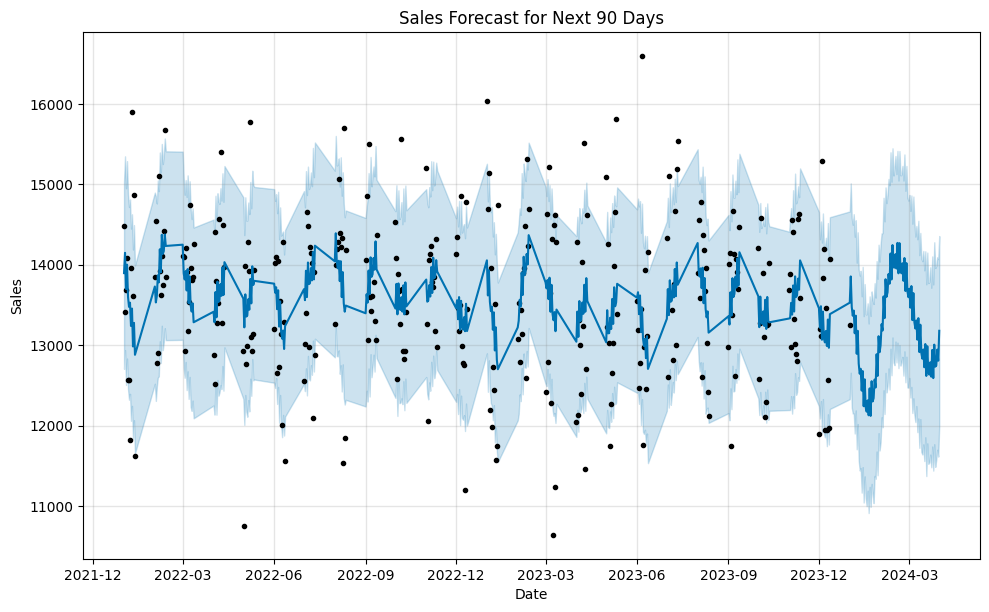

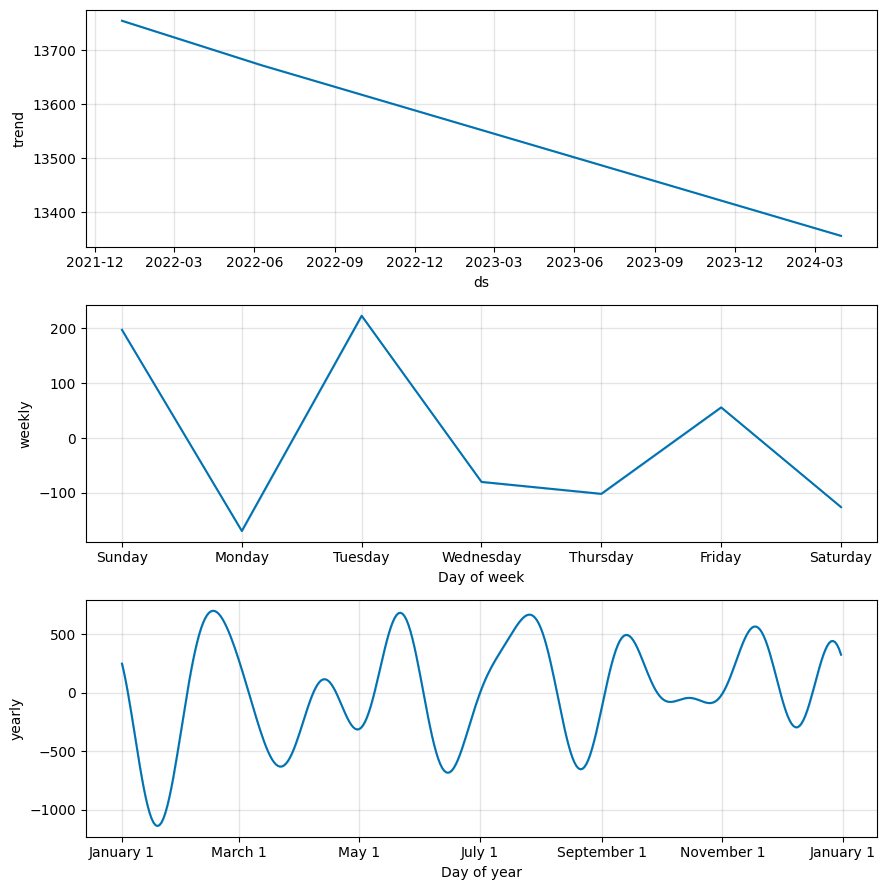

In [ ]:
import matplotlib.pyplot as plt

# 1. Future Dates Create karna
# periods=90 ka matlab agle 90 din (3 months) ka prediction
future = model.make_future_dataframe(periods=90)

# 2. Prediction karna (Asli Jaadu yahan hai)
forecast = model.predict(future)

# 3. Prediction ka data dekhna
# ds = Date
# yhat = Predicted Sales (Jo machine ne socha hai)
# yhat_lower = Kam se kam kitni sales hogi
# yhat_upper = Zyada se zyada kitni sales hogi
print("Prediction Data Sample:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 4. Graph Banana (Visualization)
print("\nGraph ban raha hai... Dekho niche 👇")
fig1 = model.plot(forecast)
plt.title("Sales Forecast for Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# 5. Trends (Components) dekhna (Optional - Yeh dikhata hai ki Monday ko sale zyada hoti hai ya Sunday ko)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
# 1. Future dates ka frame banana (Agla 1 mahina i.e., 30 days)
future = model.make_future_dataframe(periods=30)

# 2. Prediction karna
forecast = model.predict(future)

# 3. Prediction dekhna (sirf important columns)
# yhat = Prediction
# yhat_lower = Kam se kam kitna bikega
# yhat_upper = Jyada se jyada kitna bikega
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds          yhat    yhat_lower    yhat_upper
314 2024-01-27  12472.542492  11272.957180  13562.101341
315 2024-01-28  12886.378646  11724.450389  14034.587034
316 2024-01-29  12616.350896  11452.903489  13790.708275
317 2024-01-30  13110.335165  11870.174689  14384.080713
318 2024-01-31  12911.626293  11771.630160  14131.342229


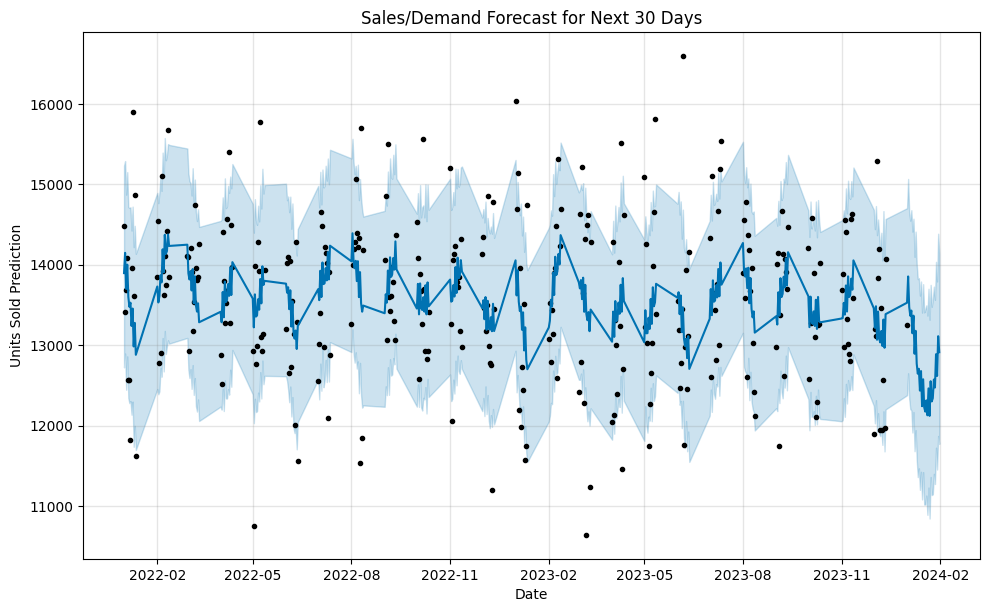

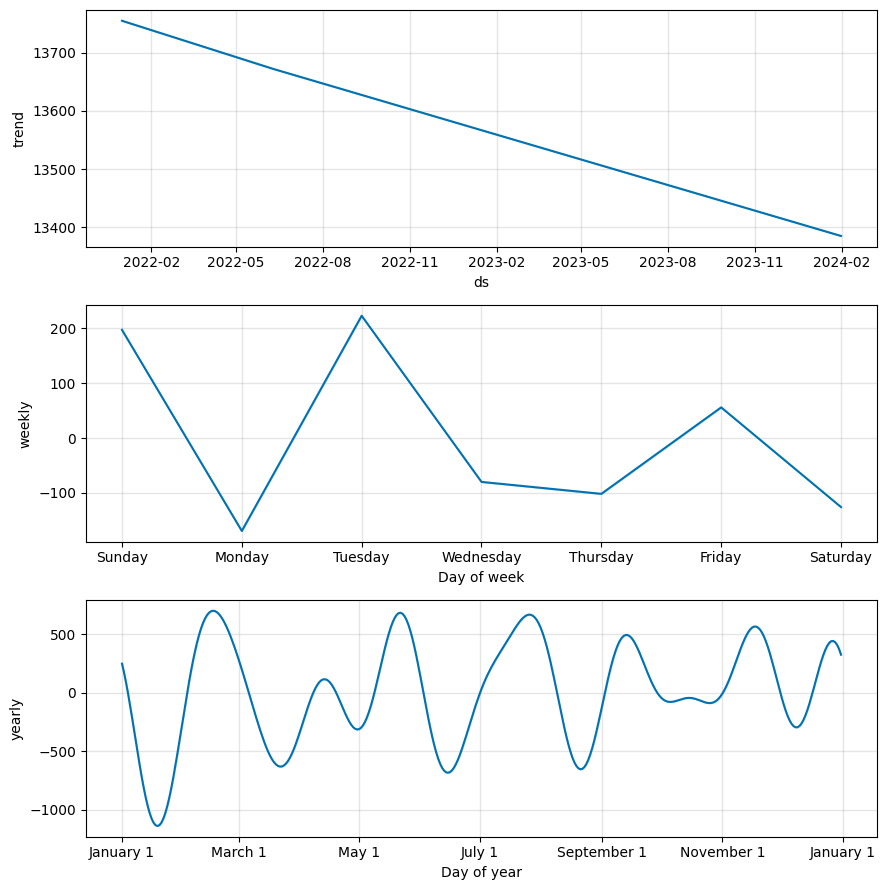

In [ ]:
# Main Forecast Graph
fig1 = model.plot(forecast)
plt.title("Sales/Demand Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Units Sold Prediction")
plt.show()

# Components Graph (Trend, Weekly pattern, Yearly pattern alag alag dikhayega)
fig2 = model.plot_components(forecast)
plt.show()